In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 1. Load the data (Adjust the filename as needed)
df = pd.read_csv('data/customer_support_tickets.csv')

# 2. Convert to datetime # Converting columns to datetime - using exact CSV header names
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

# Calculate Resolution Time in Hours
df['resolution_hours'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

# Remove anomalies (negative durations) and tickets without resolution dates
clean_df = df[df['resolution_hours'] >= 0].copy()

# Extract hour and month for trend analysis
clean_df['Submission Hour'] = clean_df['First Response Time'].dt.hour
clean_df['Submission Month'] = clean_df['First Response Time'].dt.month_name()

C:\Users\Professional\AppData\Local\Temp\ipykernel_18604\1263515452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clean_df, x='Ticket Channel', palette='viridis',


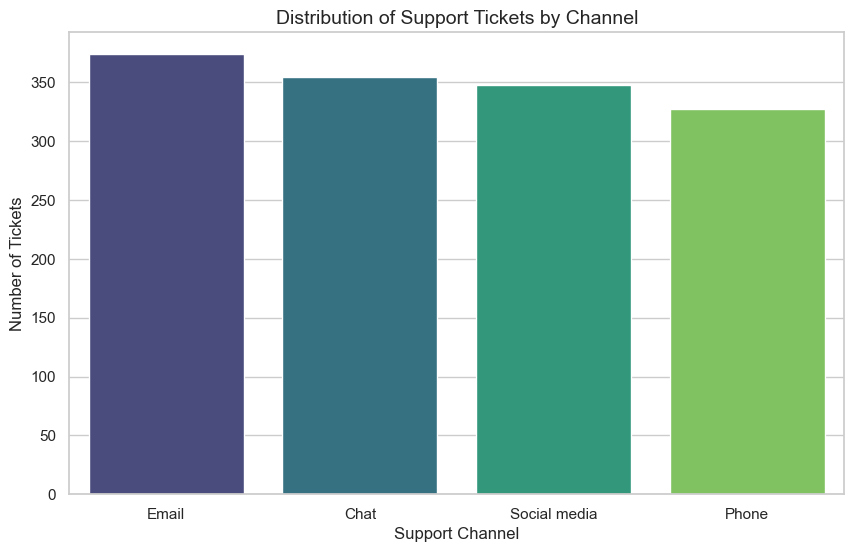

In [12]:
# Plot 1: Volume by Channel
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df, x='Ticket Channel', palette='viridis', 
              order=clean_df['Ticket Channel'].value_counts().index)

plt.title('Distribution of Support Tickets by Channel', fontsize=14)
plt.xlabel('Support Channel')
plt.ylabel('Number of Tickets')
plt.show()

C:\Users\Professional\AppData\Local\Temp\ipykernel_18604\2532213272.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=clean_df, x='Ticket Type', y='resolution_hours', palette='magma', ci=None)
C:\Users\Professional\AppData\Local\Temp\ipykernel_18604\2532213272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clean_df, x='Ticket Type', y='resolution_hours', palette='magma', ci=None)


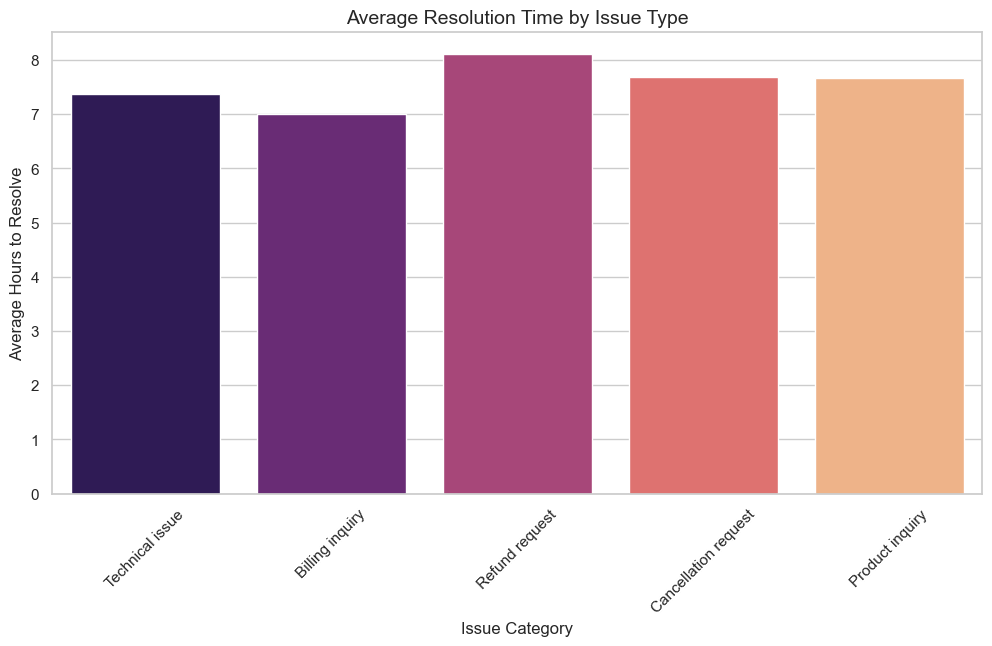

In [13]:
# Plot 2: Efficiency by Issue Type
plt.figure(figsize=(12, 6))
sns.barplot(data=clean_df, x='Ticket Type', y='resolution_hours', palette='magma', ci=None)

plt.title('Average Resolution Time by Issue Type', fontsize=14)
plt.xlabel('Issue Category')
plt.ylabel('Average Hours to Resolve')
plt.xticks(rotation=45)
plt.show()

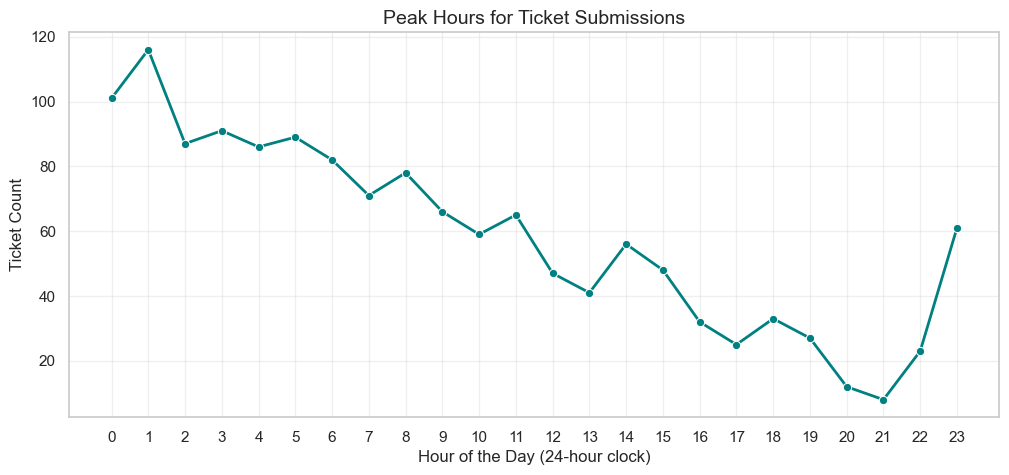

In [ ]:
# Plot 3: Peak Hour Analysis
clean_df['Hour'] = clean_df['First Response Time'].dt.hour
hourly_data = clean_df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_data.index, y=hourly_data.values, marker='o', color='teal', linewidth=2)

plt.title('Peak Hours for Ticket Submissions', fontsize=14)
plt.xlabel('Hour of the Day (24-hour clock)')
plt.ylabel('Ticket Count')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()